In [136]:
include("/Users/benjaminrutkowski/School Code Projects/CS268-Final-Project/Cross_Entropy/cross_entropy.jl")

# ================ GENERATING MODEL ================
using Random
using Statistics

Random.seed!(10)

N = 8    # Number of nodes
c = 15.0 # Initial cost 
f = 10.0 # Scaling cost

Nodes = rand(Uniform(0.0, 10.0), 2*N)
F     = rand(Uniform(0.0, 5.0), N)

sys = DemandSystem(Nodes, F, c, f, 0.3);

In [137]:
# ================ TESTING THE CROSS ENTROPY METHOD WITH LEGAL CORRECTION ================
func = x -> costFunc(sys, x) + 10*quadPenalty(sys, x)

legal_cor_cost_restults, legal_cor_penalty_results = [], []
number_of_stations = []
for i = 1:50
    point = crossEntropyLegalCorrection(sys, func, 3, 100)
    cost, penalty = costFunc(sys, point), quadPenalty(sys, point)
    push!(legal_cor_cost_restults, cost)
    push!(legal_cor_penalty_results, penalty)
    push!(number_of_stations, point[end])
end;

In [138]:
# ================ Processing Data ================
legal_cost_mean, legal_cost_std = mean(legal_cor_cost_restults), std(legal_cor_cost_restults)
legal_pen_mean, legal_pen_std = mean(legal_cor_penalty_results), std(legal_cor_penalty_results)
number_of_station_mean = mean(number_of_stations)

cost_cleaned = []
pen_cleaned = []
exclude_count = 0
for i = 1:length(legal_cor_cost_restults)
    if legal_cor_cost_restults[i] < 1000 && legal_cor_penalty_results[i] < 1000
        push!(cost_cleaned, legal_cor_cost_restults[i])
        push!(pen_cleaned, legal_cor_penalty_results[i])
    else
        exclude_count += 1
    end
end
legal_cost_mean, legal_cost_std, legal_pen_mean, legal_pen_std, number_of_station_mean, exclude_count

(4.0597820802136475e14, 2.0005073635035638e15, 2.2450893932494614e8, 1.5875090126516786e9, 1.0, 9)

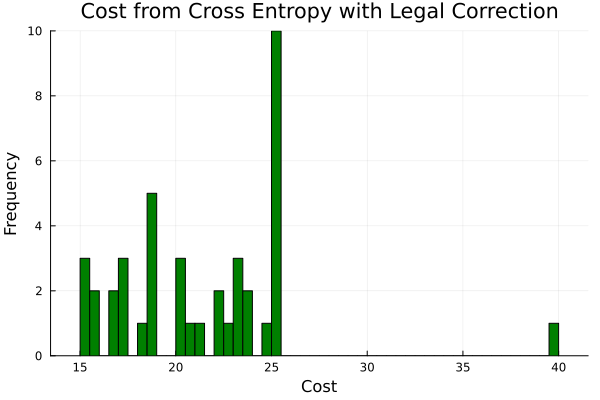

In [139]:
using Plots

legal_cost_hist = histogram(
    cost_cleaned, bins = 100, color=:green, 
    xlabel="Cost", ylabel="Frequency", legend=false,
    title="Cost from Cross Entropy with Legal Correction"
    )

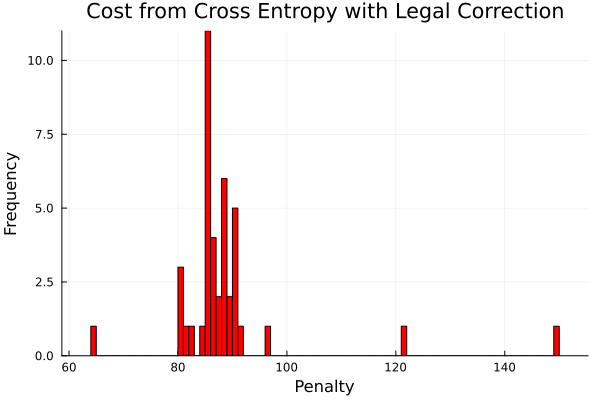

In [140]:
legal_pen_hist  = histogram(
    pen_cleaned, bins = 100, color=:red, 
    xlabel="Penalty", ylabel="Frequency", legend=false, 
    title="Cost from Cross Entropy with Legal Correction"
    )

In [141]:
# ================ TESTING THE CROSS ENTROPY METHOD WITHOUT LEGAL CORRECTION ================
func = x -> costFunc(sys, x) + 10*quadPenalty(sys, x)

cost_restults, penalty_results = [], []
for i = 1:50
    point = crossEntropy(sys, func, 3, 100, 3)
    cost, penalty = costFunc(sys, point), quadPenalty(sys, point)
    push!(cost_restults, cost)
    push!(penalty_results, penalty)
end;

In [145]:
# ================ Processing Data ================
cost_mean, cost_std = mean(cost_restults), std(cost_restults)
pen_mean, pen_std = mean(penalty_results), std(penalty_results)

cost_cleaned = []
pen_cleaned = []
for i = 1:length(cost_restults)
    if cost_restults[i] < Inf && penalty_results[i] < Inf
        push!(cost_cleaned, cost_restults[i])
        push!(pen_cleaned, penalty_results[i])
    end
end
cost_mean, cost_std, pen_mean, pen_std

(193.02822385478504, 8.882650307103777, 1.2023544050824215, 0.40879705403041183)

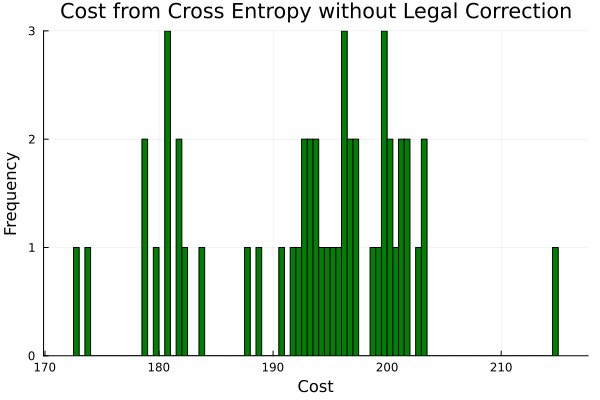

In [143]:
cost_hist = histogram(
    cost_cleaned, bins = 100, color=:green, 
    xlabel="Cost", ylabel="Frequency", legend=false,
    title="Cost from Cross Entropy without Legal Correction"
    )

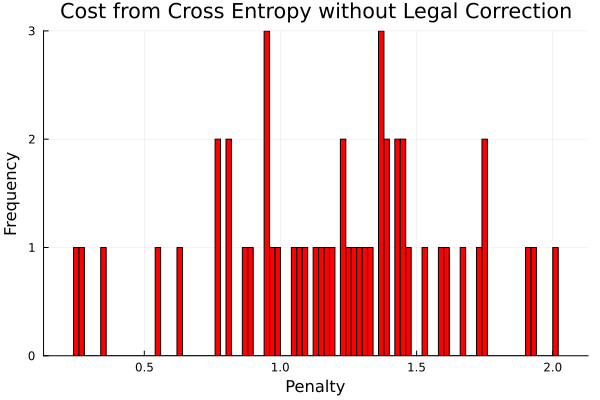

In [144]:
legal_pen_hist  = histogram(
    pen_cleaned, bins = 100, color=:red, 
    xlabel="Penalty", ylabel="Frequency", legend=false, 
    title="Cost from Cross Entropy without Legal Correction"
    )